**DECISION TREE**
----


**DATA PRE-PROCESSING**
------

In [ ]:
# Upload Dataset

from google.colab import files
uploaded = files.upload()

Saving COVID-19_Dataset.csv to COVID-19_Dataset.csv


In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree
from sklearn.tree import plot_tree


In [ ]:
# loading dataset

df = pd.read_csv('COVID-19_Dataset.csv')
print(df, "\n")

     Breathing_Problem Fever  ... Sanitization_from_Market COVID19
0                  Yes   Yes  ...                       No     Yes
1                  Yes   Yes  ...                       No     Yes
2                  Yes   Yes  ...                       No     Yes
3                  Yes   Yes  ...                       No     Yes
4                  Yes   Yes  ...                       No     Yes
...                ...   ...  ...                      ...     ...
5429               Yes   Yes  ...                       No     Yes
5430               Yes   Yes  ...                       No     Yes
5431               Yes   Yes  ...                       No      No
5432               Yes   Yes  ...                       No      No
5433               Yes   Yes  ...                       No      No

[5434 rows x 21 columns] 



The **head()** returns the first n rows for the object based on position. If your object has the right type of data in it, it is useful for quick testing. This method is used for returning top n (by default value 5) rows of a data frame or series.

In [ ]:
df.head()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


The **tail()** function displays the last 5 rows of dataframe.

In [ ]:
df.tail()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No
5433,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No


The **info()** function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing_Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry_Cough                                5434 non-null   object
 3   Sore_throat                              5434 non-null   object
 4   Running_Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic_Lung_Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart_Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper_Tension                            5434 non-null   obj

The **shape** function is used o find the shape of the dataframe.It holds the number of rows followed by the number of columns.

In [ ]:
df.shape

(5434, 21)

The **iloc()** function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

In [ ]:
# read csv file from 2000th and 2025th rows

df.iloc[2000:2025, :]

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
2000,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,Yes
2001,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes
2002,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,Yes
2003,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes
2004,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes
2005,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,Yes
2006,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,Yes
2007,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes
2008,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes
2009,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,No,No,No,Yes,No,No,No,Yes


The **column** function displays all the columns of the dataset.

In [ ]:
df.columns

Index(['Breathing_Problem', 'Fever', 'Dry_Cough', 'Sore_throat',
       'Running_Nose', 'Asthma', 'Chronic_Lung_Disease', 'Headache',
       'Heart_Disease', 'Diabetes', 'Hyper_Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad_travel', 'Contact_with_COVID_Patient',
       'Attended_Large_Gathering', 'Visited_Public_Exposed_Places',
       'Family_working_in_Public_Exposed_Places', 'Wearing_Masks',
       'Sanitization_from_Market', 'COVID19'],
      dtype='object')

The **dtype** function describes the type of data.

In [ ]:
#detect missing data

print(df.isnull().sum())


Breathing_Problem                          0
Fever                                      0
Dry_Cough                                  0
Sore_throat                                0
Running_Nose                               0
Asthma                                     0
Chronic_Lung_Disease                       0
Headache                                   0
Heart_Disease                              0
Diabetes                                   0
Hyper_Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad_travel                              0
Contact_with_COVID_Patient                 0
Attended_Large_Gathering                   0
Visited_Public_Exposed_Places              0
Family_working_in_Public_Exposed_Places    0
Wearing_Masks                              0
Sanitization_from_Market                   0
COVID19                                    0
dtype: int64


In [ ]:
df.dtypes

Breathing_Problem                          object
Fever                                      object
Dry_Cough                                  object
Sore_throat                                object
Running_Nose                               object
Asthma                                     object
Chronic_Lung_Disease                       object
Headache                                   object
Heart_Disease                              object
Diabetes                                   object
Hyper_Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad_travel                              object
Contact_with_COVID_Patient                 object
Attended_Large_Gathering                   object
Visited_Public_Exposed_Places              object
Family_working_in_Public_Exposed_Places    object
Wearing_Masks                              object
Sanitization_from_Market                   object


**Categorical Encoding**

It is the process of converting categorical data into integer format.

In [ ]:
df['Breathing_Problem'] = df['Breathing_Problem'].astype('category')
df['Fever'] = df['Fever'].astype('category')
df['Dry_Cough'] = df['Dry_Cough'].astype('category')
df['Sore_throat'] = df['Sore_throat'].astype('category')
df['Running_Nose'] = df['Running_Nose'].astype('category')
df['Asthma'] = df['Asthma'].astype('category')
df['Chronic_Lung_Disease'] = df['Chronic_Lung_Disease'].astype('category')
df['Headache'] = df['Headache'].astype('category')
df['Heart_Disease'] = df['Heart_Disease'].astype('category')
df['Diabetes'] = df['Diabetes'].astype('category')
df['Hyper_Tension'] = df['Hyper_Tension'].astype('category')
df['Fatigue '] = df['Fatigue '].astype('category')
df['Gastrointestinal '] = df['Gastrointestinal '].astype('category')
df['Abroad_travel'] = df['Abroad_travel'].astype('category')
df['Contact_with_COVID_Patient'] = df['Contact_with_COVID_Patient'].astype('category')
df['Attended_Large_Gathering'] = df['Attended_Large_Gathering'].astype('category')
df['Visited_Public_Exposed_Places'] = df['Visited_Public_Exposed_Places'].astype('category')
df['Family_working_in_Public_Exposed_Places'] = df['Family_working_in_Public_Exposed_Places'].astype('category')
df['Wearing_Masks'] = df['Wearing_Masks'].astype('category')
df['Sanitization_from_Market'] = df['Sanitization_from_Market'].astype('category')
df['COVID19'] = df['COVID19'].astype('category')
df.dtypes

Breathing_Problem                          category
Fever                                      category
Dry_Cough                                  category
Sore_throat                                category
Running_Nose                               category
Asthma                                     category
Chronic_Lung_Disease                       category
Headache                                   category
Heart_Disease                              category
Diabetes                                   category
Hyper_Tension                              category
Fatigue                                    category
Gastrointestinal                           category
Abroad_travel                              category
Contact_with_COVID_Patient                 category
Attended_Large_Gathering                   category
Visited_Public_Exposed_Places              category
Family_working_in_Public_Exposed_Places    category
Wearing_Masks                              category
Sanitization

In [ ]:
df['Breathing_Problem'] = df['Breathing_Problem'].cat.codes
df['Fever'] = df['Fever'].cat.codes
df['Dry_Cough'] = df['Dry_Cough'].cat.codes
df['Sore_throat'] = df['Sore_throat'].cat.codes
df['Running_Nose'] = df['Running_Nose'].cat.codes
df['Asthma'] = df['Asthma'].cat.codes
df['Chronic_Lung_Disease'] = df['Chronic_Lung_Disease'].cat.codes
df['Headache'] = df['Headache'].cat.codes
df['Heart_Disease'] = df['Heart_Disease'].cat.codes
df['Diabetes'] = df['Diabetes'].cat.codes
df['Hyper_Tension'] = df['Hyper_Tension'].cat.codes
df['Fatigue '] = df['Fatigue '].cat.codes
df['Gastrointestinal '] = df['Gastrointestinal '].cat.codes
df['Abroad_travel'] = df['Abroad_travel'].cat.codes
df['Contact_with_COVID_Patient'] = df['Contact_with_COVID_Patient'].cat.codes
df['Attended_Large_Gathering'] = df['Attended_Large_Gathering'].cat.codes
df['Visited_Public_Exposed_Places'] = df['Visited_Public_Exposed_Places'].cat.codes
df['Family_working_in_Public_Exposed_Places'] = df['Family_working_in_Public_Exposed_Places'].cat.codes
df['Wearing_Masks'] = df['Wearing_Masks'].cat.codes
df['Sanitization_from_Market'] = df['Sanitization_from_Market'].cat.codes
df['COVID19'] = df['COVID19'].cat.codes
df.dtypes
df

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df)

      Breathing_Problem  Fever  ...  Sanitization_from_Market  COVID19
0                     1      1  ...                         0        1
1                     1      1  ...                         0        1
2                     1      1  ...                         0        1
3                     1      1  ...                         0        1
4                     1      1  ...                         0        1
...                 ...    ...  ...                       ...      ...
5429                  1      1  ...                         0        1
5430                  1      1  ...                         0        1
5431                  1      1  ...                         0        0
5432                  1      1  ...                         0        0
5433                  1      1  ...                         0        0

[5434 rows x 21 columns]


In [ ]:
df.head()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


The **describe()** method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:
df.describe()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,0.490063,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,0.499947,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


The **corr()** function is used to find the pairwise correlation of all columns in the dataframe.

In [ ]:
df.corr()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
Breathing_Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry_Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore_throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running_Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic_Lung_Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart_Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


In [ ]:
from google.colab import files
import pandas as pd
df.to_csv('Pre-Processed COVID-19 Dataset.csv')
files.download('Pre-Processed COVID-19 Dataset.csv')

**DATA VISUALIZATION**
------

In [ ]:
# Plot of COVID Status

df['COVID19'].value_counts()

1    4383
0    1051
Name: COVID19, dtype: int64

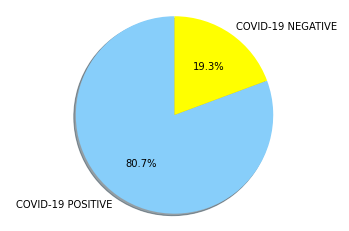

In [ ]:
labels ='COVID-19 POSITIVE', 'COVID-19 NEGATIVE'
sizes = [4383, 1051]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

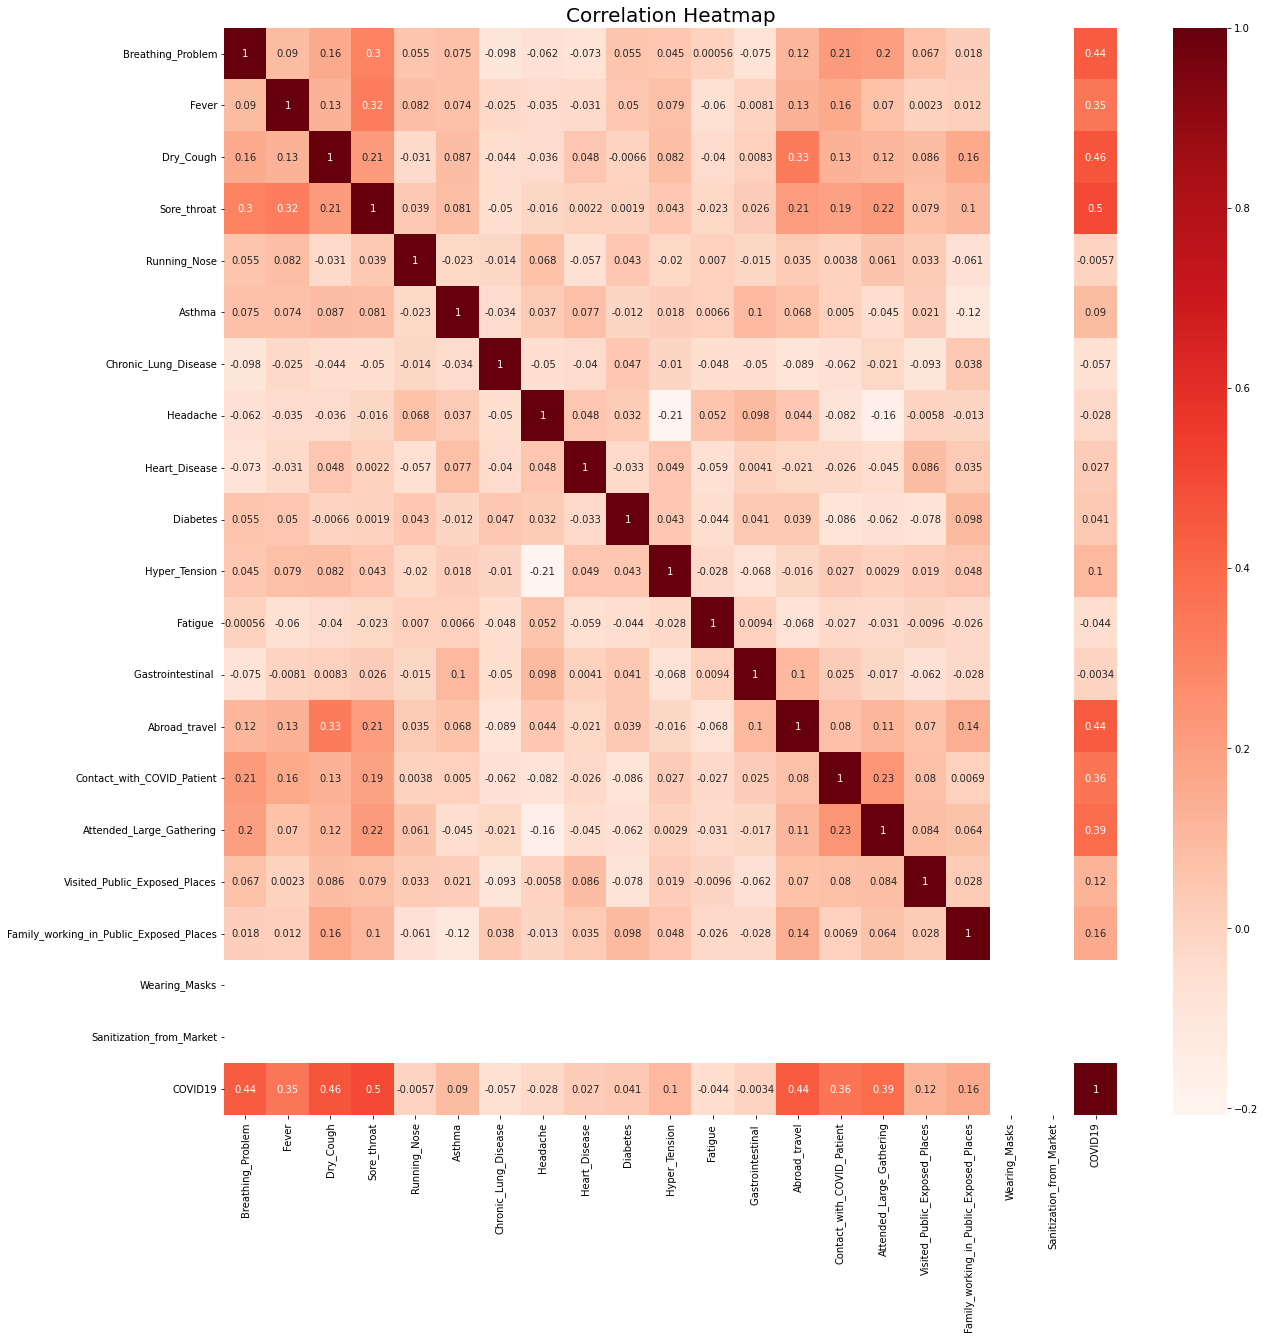

In [ ]:
# See correlation between variables through a correlation heatmap

corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

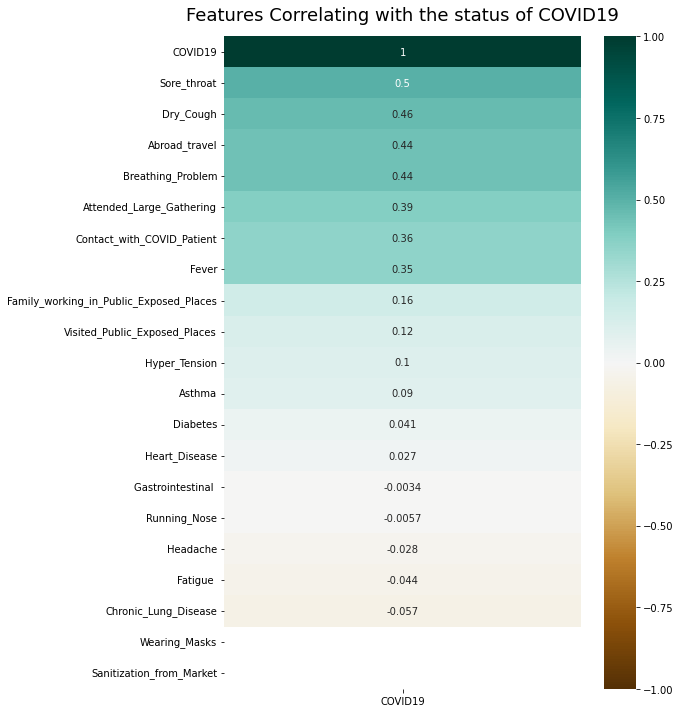

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['COVID19']].sort_values(by='COVID19', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of COVID19', fontdict={'fontsize':18}, pad=16);

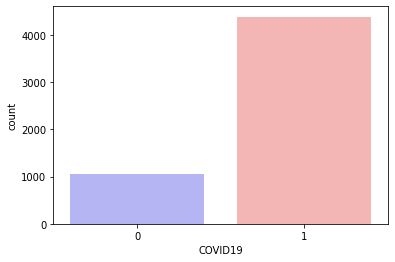

In [ ]:
sns.countplot(x='COVID19',data=df,palette='bwr')

**SPLITTING DATASET**
-----

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
# Uploading the pre-processed dataset

from google.colab import files
uploaded = files.upload()

Saving Pre-Processed COVID-19 Dataset.csv to Pre-Processed COVID-19 Dataset.csv


In [ ]:
data = pd.read_csv('Pre-Processed COVID-19 Dataset.csv')
data.head()

,Unnamed: 0,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID19
0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
x=data.drop('COVID19',axis=1)
y=data.COVID19

In [ ]:
# Values used such as 0.20 where 20 percent of the dataset will be allocated to the test set and 80 percent will be allocated to the training set.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)

In [ ]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((4347, 21), (1087, 21))

In [ ]:
y_train.shape,y_test.shape

((4347,), (1087,))

In [ ]:
# Display x_train

x_train


,Unnamed: 0,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market
2401,2401,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0
1977,1977,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4001,4001,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0
5328,5328,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0
5147,5147,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4931,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
3264,3264,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0
1653,1653,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,0
2607,2607,0,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
x_test

,Unnamed: 0,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market
5145,5145,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0
502,502,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0
2550,2550,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
2260,2260,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0
3641,3641,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,599,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0
1590,1590,1,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0
1085,1085,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0
4184,4184,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0


In [ ]:
y_train

2401    1
1977    1
4001    1
5328    1
5147    1
       ..
4931    0
3264    1
1653    1
2607    1
2732    1
Name: COVID19, Length: 4347, dtype: int64

In [ ]:
y_test

5145    1
502     1
2550    1
2260    1
3641    1
       ..
599     1
1590    1
1085    1
4184    0
649     1
Name: COVID19, Length: 1087, dtype: int64

**FEATURE IMPORTANCE :**
------


In [ ]:
print( "\n\nFeature_importances: ",df.feature_importances_,
      "\n\nmax_features:",df.max_features_,)



Feature_importances:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

max_features: 21


All the feature importance values calculated were zero so we couldn't take any of the specific feature to compute and hence we neglected the point of feature importance and took all the features into consideration.

**THEORY:**
------

**DECISION TREE**
-------

A Decision Tree is a supervised machine learning algorithm for solving classification and Regression problems.

Used for handling non-linear dataset.

Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas.

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

**DECISION TREE WITHOUT USING ANY CRITERION**

[[192   0]
 [  1 894]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087

0.9990800367985281


[Text(0.3333333333333333, 0.875, 'X[0] <= 4074.0\ngini = 0.317\nsamples = 4347\nvalue = [859, 3488]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 3235\nvalue = [0, 3235]'),
 Text(0.5, 0.625, 'X[0] <= 5122.0\ngini = 0.352\nsamples = 1112\nvalue = [859, 253]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 857\nvalue = [857, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 5429.5\ngini = 0.016\nsamples = 255\nvalue = [2, 253]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 253\nvalue = [0, 253]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

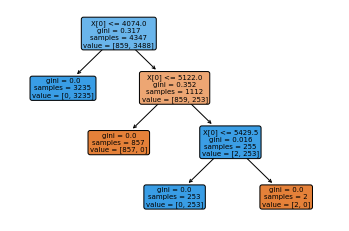

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier()
df.fit(x_train,y_train)
predictions=df.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

tree.plot_tree(df.fit(x_train,y_train),max_depth=3,fontsize = 7,rounded=True,filled=True)


**GINI INDEX**
------

Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly.

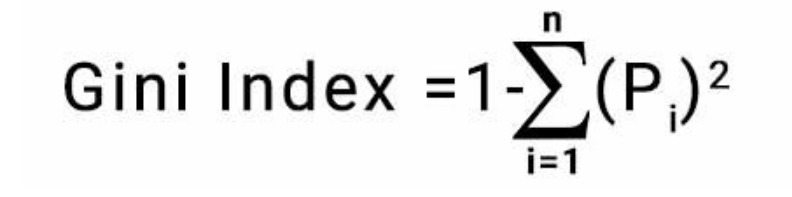


**Decision Tree Classifier with criterion gini index for DEPTH=3**
------

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model

clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Predict the Test set results with criterion gini index**

In [ ]:
y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)

[1 1 1 ... 1 0 1]


In [ ]:
leaves=clf_gini.get_n_leaves
leaves

<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(max_depth=3, random_state=0)>

**Check accuracy score with criterion gini index**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9991


**Compare the train-set and test-set accuracy**

Compare the train-set and test-set accuracy to check for overfitting and underfitting conditions.

In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9991


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 0.9991. These two values are quite comparable. So, there is no sign of overfitting.

**Display Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [ ]:
y_pred_test_gini = clf_gini.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_gini))

Classification report - 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



**Calculation of Mean Absolute Error,MSE,RMSE**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_gini))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_gini))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gini)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_gini))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_gini))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_gini)))


Mean Absolute Error for test : 0.0009199632014719411
Mean Squared Error for test: 0.0009199632014719411
Root Mean Squared Error for test: 0.030330895164368973
-------------------------------------------------------------
Mean Absolute Error for train: 0.0
Mean Squared Error for train: 0.0
Root Mean Squared Error for train: 0.0


**VISUALIZATION OF TREE FOR DEPTH=3**

[Text(0.3333333333333333, 0.875, 'X[0] <= 4074.0\ngini = 0.317\nsamples = 4347\nvalue = [859, 3488]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 3235\nvalue = [0, 3235]'),
 Text(0.5, 0.625, 'X[0] <= 5122.0\ngini = 0.352\nsamples = 1112\nvalue = [859, 253]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 857\nvalue = [857, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 5429.5\ngini = 0.016\nsamples = 255\nvalue = [2, 253]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 253\nvalue = [0, 253]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

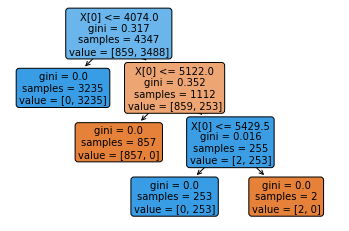

In [ ]:
tree.plot_tree(clf_gini.fit(x_train,y_train),max_depth=3,fontsize = 10,rounded=True,filled=True)

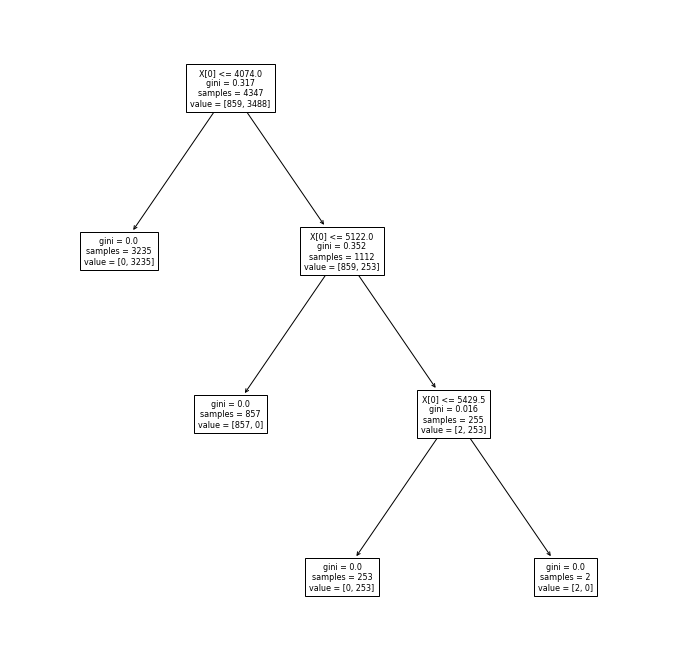

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
tree.plot_tree(clf_gini,fontsize=8)
plt.show()

**Decision Tree Classifier with criterion gini index for DEPTH=2**
------

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# fit the model

clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

**Predict the Test set results with criterion gini index**

In [ ]:
y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)

[1 1 1 ... 1 0 1]


In [ ]:
leaves=clf_gini.get_n_leaves
leaves

<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(max_depth=2, random_state=0)>

**Check accuracy score with criterion gini index**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9991


**Compare the train-set and test-set accuracy**

Compare the train-set and test-set accuracy to check for overfitting and underfitting conditions.

In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9995


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9995
Test set score: 0.9991


Here, the training-set accuracy score is 0.9995 while the test-set accuracy to be 0.9991. These two values are quite comparable. So, there is no sign of overfitting.

**Display Classification Report**

In [ ]:
y_pred_test_gini = clf_gini.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_gini))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



**Calculation of Mean Absolute Error,MSE,RMSE**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_gini))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_gini))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gini)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_gini))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_gini))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_gini)))


Mean Absolute Error for test : 0.0009199632014719411
Mean Squared Error for test: 0.0009199632014719411
Root Mean Squared Error for test: 0.030330895164368973
-------------------------------------------------------------
Mean Absolute Error for train: 0.00046008741660915573
Mean Squared Error for train: 0.00046008741660915573
Root Mean Squared Error for train: 0.02144964840292623


**VISUALIZATION OF TREE FOR DEPTH=2**

[Text(0.4, 0.8333333333333334, 'X[0] <= 4074.0\ngini = 0.317\nsamples = 4347\nvalue = [859, 3488]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3235\nvalue = [0, 3235]'),
 Text(0.6, 0.5, 'X[0] <= 5122.0\ngini = 0.352\nsamples = 1112\nvalue = [859, 253]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 857\nvalue = [857, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.016\nsamples = 255\nvalue = [2, 253]')]

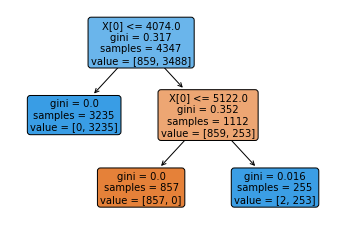

In [ ]:
tree.plot_tree(clf_gini.fit(x_train,y_train),max_depth=2,fontsize = 10,rounded=True,filled=True)

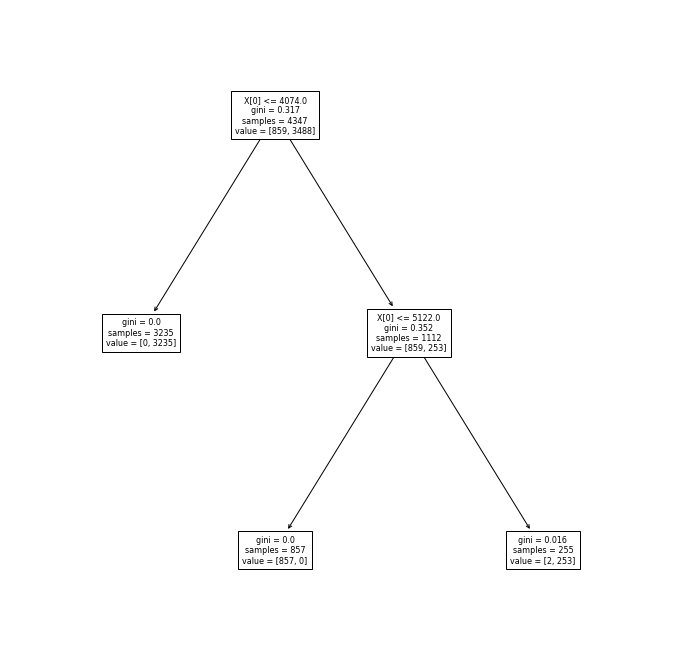

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
tree.plot_tree(clf_gini,fontsize=8)
plt.show()

**Decision Tree Classifier with criterion gini index for DEPTH=4**
---

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

# fit the model

clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

**Predict the Test set results with criterion gini index**


In [ ]:
y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)

[1 1 1 ... 1 0 1]


In [ ]:
leaves=clf_gini.get_n_leaves
leaves

<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(max_depth=4, random_state=0)>

**Check accuracy score with criterion gini index**

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9991


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9991


Here, the training-set accuracy score is 1.000 while the test-set accuracy to be 0.9991. These two values are quite comparable. So, there is no sign of slightly underfitting.

**Display Classification Report**

In [ ]:
y_pred_test_gini = clf_gini.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_gini))

Classification report - 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



**Calculation of Mean Absolute Error,MSE,RMSE**

In [ ]:
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_gini))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_gini))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gini)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_gini))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_gini))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_gini)))

Mean Absolute Error for test : 0.0009199632014719411
Mean Squared Error for test: 0.0009199632014719411
Root Mean Squared Error for test: 0.030330895164368973
-------------------------------------------------------------
Mean Absolute Error for train: 0.00046008741660915573
Mean Squared Error for train: 0.00046008741660915573
Root Mean Squared Error for train: 0.02144964840292623


**VISUALIZATION OF TREE FOR DEPTH=4**






[Text(0.3333333333333333, 0.875, 'X[0] <= 4074.0\ngini = 0.317\nsamples = 4347\nvalue = [859, 3488]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 3235\nvalue = [0, 3235]'),
 Text(0.5, 0.625, 'X[0] <= 5122.0\ngini = 0.352\nsamples = 1112\nvalue = [859, 253]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 857\nvalue = [857, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 5429.5\ngini = 0.016\nsamples = 255\nvalue = [2, 253]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 253\nvalue = [0, 253]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

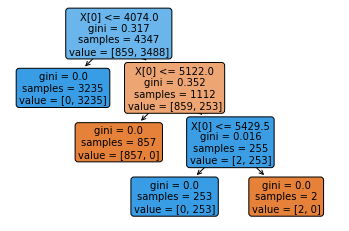

In [ ]:
tree.plot_tree(clf_gini.fit(x_train,y_train),max_depth=4,fontsize = 10,rounded=True,filled=True)

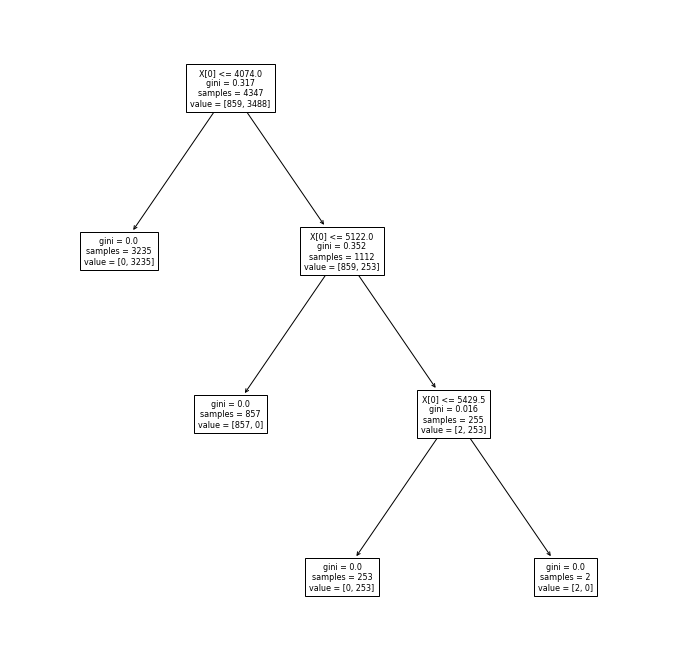

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
tree.plot_tree(clf_gini,fontsize=8)
plt.show()

**Confusion matrix**
------

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[192   0]
 [  1 894]]


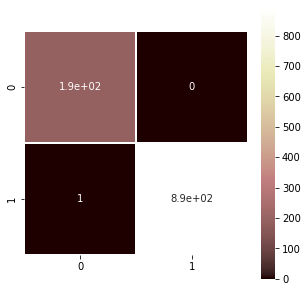

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_gini)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'pink')


**ENTROPY**
--

Entropy can be defined as a measure of the purity of the sub split. Entropy always lies between 0 to 1. The entropy of any split can be calculated by this formula.

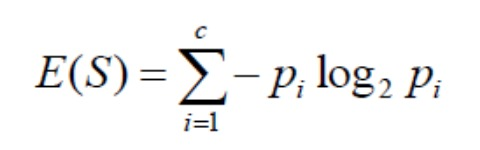

**Decision Tree Classifier with criterion ENTROPY for DEPTH=3**
-----

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

**Predict the Test set results with criterion entropy**

In [ ]:
y_pred_en = clf_en.predict(x_test)

**Check accuracy score with criterion entropy**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9991


**Compare the train-set and test-set accuracy**

Compare the train-set and test-set accuracy to check for overfitting and underfitting conditions.

In [ ]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9991


The training-set accuracy score is 1.0000 while the test-set accuracy to be 0.9991. These two values are quite comparable. So, there is no sign of overfitting.

**Print the Classification Report**

In [ ]:
y_pred_test_entropy = clf_en.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_entropy))

Classification report - 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



**Calculation of Mean Absolute Error,MSE,RMSE**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_entropy))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_entropy))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_entropy)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_en))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_en))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_en)))

Mean Absolute Error for test : 0.0009199632014719411
Mean Squared Error for test: 0.0009199632014719411
Root Mean Squared Error for test: 0.030330895164368973
-------------------------------------------------------------
Mean Absolute Error for train: 0.0
Mean Squared Error for train: 0.0
Root Mean Squared Error for train: 0.0


**VISUALIZATION OF TREE FOR DEPTH=3**

[Text(0.3333333333333333, 0.875, 'X[0] <= 4074.0\nentropy = 0.717\nsamples = 4347\nvalue = [859, 3488]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 3235\nvalue = [0, 3235]'),
 Text(0.5, 0.625, 'X[0] <= 5122.0\nentropy = 0.774\nsamples = 1112\nvalue = [859, 253]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 857\nvalue = [857, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 5429.5\nentropy = 0.066\nsamples = 255\nvalue = [2, 253]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 253\nvalue = [0, 253]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

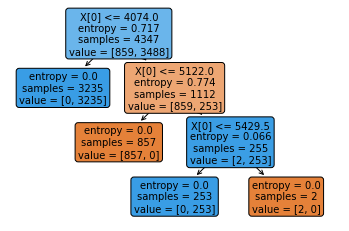

In [ ]:
tree.plot_tree(clf_en.fit(x_train,y_train),max_depth=3,fontsize = 10,rounded=True,filled=True)

**Decision Tree Classifier with criterion ENTROPY for DEPTH=2**
-----

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

**Predict the Test set results with criterion entropy**

In [ ]:
y_pred_en = clf_en.predict(x_test)

**Check accuracy score with criterion entropy**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9991


**Compare the train-set and test-set accuracy**

Compare the train-set and test-set accuracy to check for overfitting and underfitting conditions.

In [ ]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9995


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.9995
Test set score: 0.9991


The training-set accuracy score is 0.9995 while the test-set accuracy to be 0.9991. These two values are quite comparable. So, there is no sign of overfitting.

**Print the Classification Report**

In [ ]:
y_pred_test_entropy = clf_en.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred_test_entropy))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



**Calculation of Mean Absolute Error,MSE,RMSE**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test,y_pred_test_entropy))
print('Mean Squared Error for test:', metrics.mean_squared_error(y_test, y_pred_test_entropy))
print('Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_entropy)))

print("-------------------------------------------------------------")

print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train,y_pred_train_en))
print('Mean Squared Error for train:', metrics.mean_squared_error(y_train, y_pred_train_en))
print('Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_en)))

Mean Absolute Error for test : 0.0009199632014719411
Mean Squared Error for test: 0.0009199632014719411
Root Mean Squared Error for test: 0.030330895164368973
-------------------------------------------------------------
Mean Absolute Error for train: 0.00046008741660915573
Mean Squared Error for train: 0.00046008741660915573
Root Mean Squared Error for train: 0.02144964840292623


**VISUALIZATION OF TREE FOR DEPTH=2**

[Text(0.4, 0.8333333333333334, 'X[0] <= 4074.0\nentropy = 0.717\nsamples = 4347\nvalue = [859, 3488]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3235\nvalue = [0, 3235]'),
 Text(0.6, 0.5, 'X[0] <= 5122.0\nentropy = 0.774\nsamples = 1112\nvalue = [859, 253]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 857\nvalue = [857, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.066\nsamples = 255\nvalue = [2, 253]')]

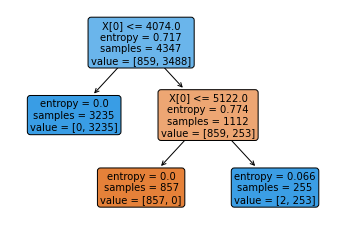

In [ ]:
tree.plot_tree(clf_en.fit(x_train,y_train),max_depth=2,fontsize = 10,rounded=True,filled=True)

**Confusion matrix**
------

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[191   1]
 [  0 895]]


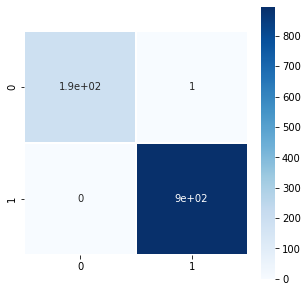

In [ ]:
cm = confusion_matrix(y_test, y_pred_en)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')


**COMPARISON of GINI and ENTROPY (Accuracy,precision and recall and F1 score)**
------

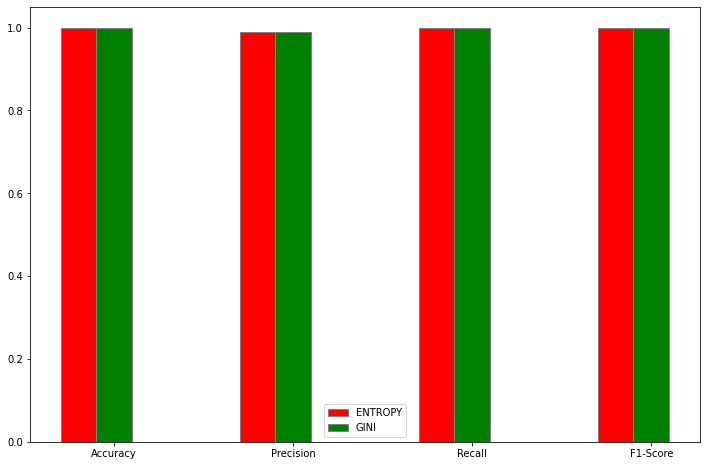

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

barWidth=0.20
fig=plt.subplots(figsize=(12,8))

entropy=[0.9991,0.99,1.00,1.00 ]
gini=[0.9991,0.99,1.00,1.00]

br1=np.arange(len(entropy))
br2=[x+barWidth for x in br1]

plt.bar(br1,entropy,color='r',width=barWidth,edgecolor='grey',label='ENTROPY')
plt.bar(br2,gini,color='g',width=barWidth,edgecolor='grey',label='GINI')

plt.xticks([r+barWidth for r in range(len(entropy))],['Accuracy','Precision','Recall','F1-Score'])

plt.legend()
plt.show()

**DECISION TREE REGRESSOR**
------

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual' :y_test, 'predicted' :y_pred})

In [ ]:
df.head(40)

,Actual,predicted
5145,1,1.0
502,1,1.0
2550,1,1.0
2260,1,1.0
3641,1,1.0
3495,1,1.0
5023,0,0.0
2450,1,1.0
2932,1,1.0
2455,1,1.0
